In [138]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
# importing both files
bookings= pd.read_csv('Bookings.csv')
sessions= pd.read_csv('Sessions.csv')


In [35]:
# 1. Find the number of distinct bookings, sessions and searches from the given data sets
distinct_bookings=bookings['booking_id'].nunique()
distinct_sessions=sessions['session_id'].nunique()
distinct_searches= sessions['search_id'].nunique()
print('Number of distinct bookings: ',distinct_bookings)
print('Number of distinct sessions: ',distinct_sessions)
print('Number of distinct searches: ',distinct_searches)

Number of distinct bookings:  339
Number of distinct sessions:  331
Number of distinct searches:  1360


In [37]:
# 2 How many sessions have more than one booking
session_booking_count=sessions['booking_id'].value_counts()
session_with_multiple_bookings=session_booking_count[session_booking_count>1]
print('Number of sessions with more than one booking: ',len(session_with_multiple_bookings))

Number of sessions with more than one booking:  28


 The day with 65 bookings is Thursday


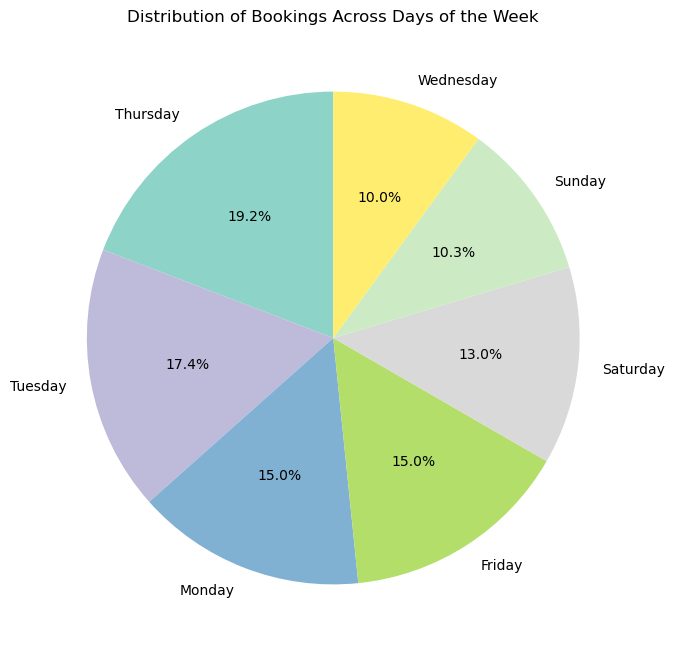

In [60]:

# 3 days of the week have the highest number of bookings? Also, draw a pie chart to show the distribution for all days of the week
bookings['booking_time']= pd.to_datetime(bookings['booking_time'])
# extracting name of the day 
bookings['day_of_week']=bookings['booking_time'].dt.day_name()

# day wise bookingg
day_bookings= bookings['day_of_week'].value_counts()
print(f' The day with {day_bookings.max()} bookings is {day_bookings.idxmax()}')

# plot the distribution of  bookings across all days of hte week 
plt.figure(figsize=(8,8))
day_bookings.plot(kind='pie',autopct='%1.1f%%',startangle=90,cmap='Set3',legend=False)
plt.title('Distribution of Bookings Across Days of the Week')
plt.ylabel('')
plt.show()

In [91]:
# 4 For each of the service names, display the total number of bookings and the total Gross Booking Value in INR

service_stats= bookings.groupby('service_name').agg(
    totalBookings= ('service_name','count'),
    totalGrossBookingValue=('INR_Amount','sum'),
    
)
service_stats['totalGrossBookingValue'] = service_stats['totalGrossBookingValue'].apply(lambda x: f"\u20B9{x:,.2f}")
print(service_stats)

              totalBookings totalGrossBookingValue
service_name                                      
GOIBIBO                 186          ₹5,897,637.97
MMT                      48            ₹665,669.08
YATRA                   105          ₹3,378,702.13


In [111]:
# 5 for customers who have more than 1 booking, which is the most booked route (from_city to to_city)

customer_booking_count= bookings['customer_id'].value_counts()
# customers with more than one booking
customers_with_multiple_bookings= customer_booking_count[customer_booking_count>1].index
filteredBookings=bookings[bookings['customer_id'].isin(customers_with_multiple_bookings)]
filteredBookings = filteredBookings.copy()
filteredBookings['route']= filteredBookings['from_city']+' to '+filteredBookings['to_city']
route_count= filteredBookings['route'].value_counts()
print(f'The most booked route is {route_count.idxmax()} with {route_count.max()} bookings')

The most booked route is Gurgaon to Roissy-en-France with 5 bookings


In [134]:
# 6 Which are the top 3 departure cities from where customers book mosstly in advance, provided that there ahve been at lease 5 departures from that city
city_stats=bookings.groupby('from_city').agg(
    total_departures=('from_city','count'),
    avg_days_to_departure=('days_to_departure','mean')
    
)
# cities with atleast 5 departures

filtered_departure= city_stats[city_stats['total_departures']>5]
top_cities= filtered_departure.sort_values(by='avg_days_to_departure',ascending=False).head(3)

print(top_cities)

            total_departures  avg_days_to_departure
from_city                                          
Bālāpur                    6              46.166667
Devanhalli                24              29.583333
Chennai                   16              26.187500


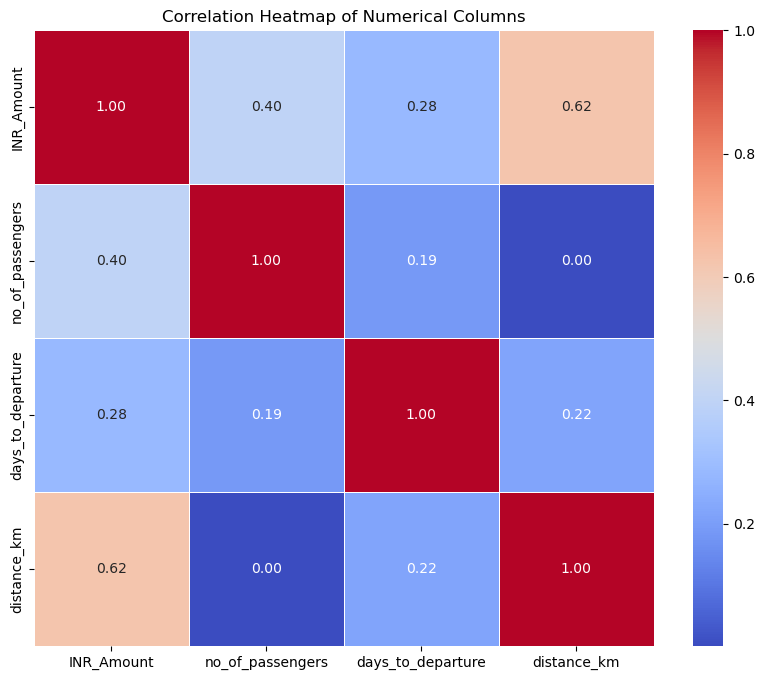

The pair of numerical columns with the maximum correlation is:  ('INR_Amount', 'distance_km')
with a coorelation value of :  0.6235653096997817


In [146]:
# 7 Plot a heatmap displaying correlations of the numerical column and report which pair of numerical columns in the bookings data set, have the  maximum correlation
numerical_columns= bookings.select_dtypes(include=['float64','int64']).columns
correlation_matrix= bookings[numerical_columns].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()
np.fill_diagonal(correlation_matrix.values,0)
print('The pair of numerical columns with the maximum correlation is: ', correlation_matrix.stack().idxmax())
print('with a coorelation value of : ',correlation_matrix.max().max())

In [182]:
# 8 For each service , which is the most used device type for making bookings on the platform
service_stats=bookings.groupby(['service_name','device_type_used']).size().reset_index(name='count')

most_used_device= service_stats.loc[service_stats.groupby('service_name')['count'].idxmax()]
print('Most Used device for each service:')
print(most_used_device.sort_values(by='count',ascending=False))


Most Used device for each service:
  service_name device_type_used  count
2      GOIBIBO              IOS     70
9        YATRA          Desktop     51
5          MMT          Desktop     30


   year_quarter device_type_used  bookings_count
0        2018Q3          Android               3
1        2018Q3          Desktop               6
2        2018Q3        MobileWeb               2
3        2018Q3           Tablet               1
4        2018Q4          Android               3
5        2018Q4          Desktop              22
6        2018Q4              IOS               4
7        2018Q4        MobileWeb               4
8        2018Q4           Tablet               1
9        2019Q1          Desktop               1
10       2019Q2          Desktop               1
11       2019Q2           Tablet               1
12       2019Q3          Android               3
13       2019Q3          Desktop               7
14       2019Q3              IOS               4
15       2019Q4          Android              14
16       2019Q4          Desktop              15
17       2019Q4              IOS              14
18       2020Q1          Android              19
19       2020Q1     

<Figure size 1200x800 with 0 Axes>

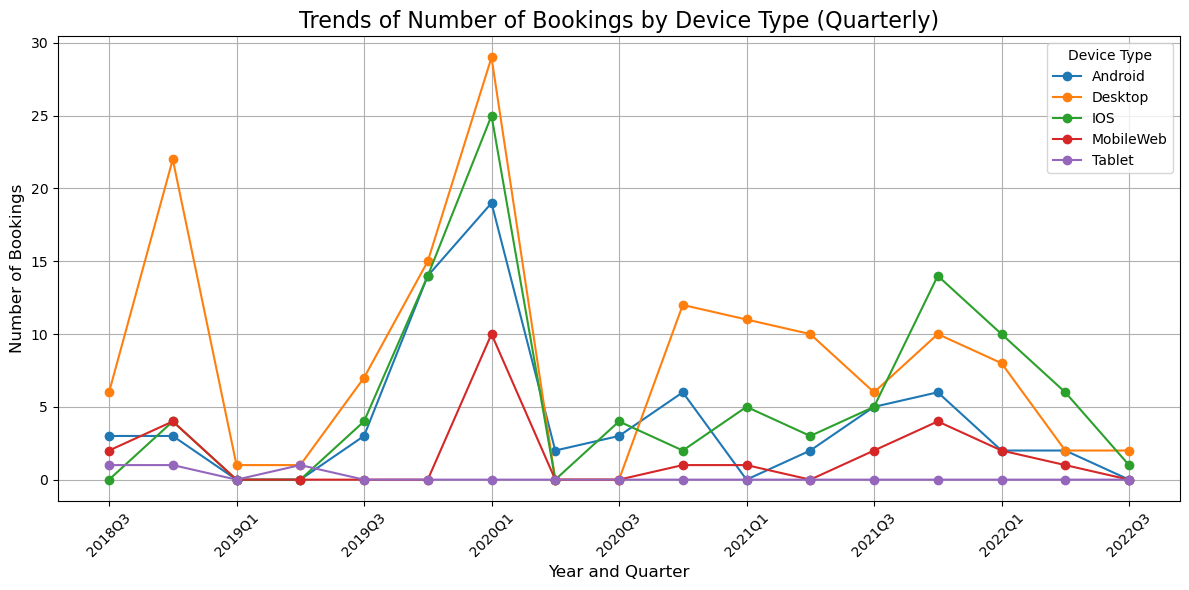

In [191]:
# 9 Plot the trends at a quarterly frequency for the number of bookings by each of the device types, that is, plot a time series for each year and quarter showing the number of bookings  performed by each device type.
bookings['booking_time']= pd.to_datetime(bookings['booking_time']).dt.tz_localize(None)
bookings['year_quarter']=bookings['booking_time'].dt.to_period('Q')
device_trends = bookings.groupby(['year_quarter', 'device_type_used']).size().reset_index(name='bookings_count')


device_trends_pivot = device_trends.pivot(index='year_quarter', columns='device_type_used', values='bookings_count')
device_trends_pivot = device_trends_pivot.fillna(0)
device_trends_pivot.index = device_trends_pivot.index.astype(str)
# Plot the trends
plt.figure(figsize=(12, 8))
device_trends_pivot.plot(kind='line', marker='o', figsize=(12, 6))

# Customize the plot
plt.title('Trends of Number of Bookings by Device Type (Quarterly)', fontsize=16)
plt.xlabel('Year and Quarter', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Device Type')

# Show the plot
plt.tight_layout()
plt.show()

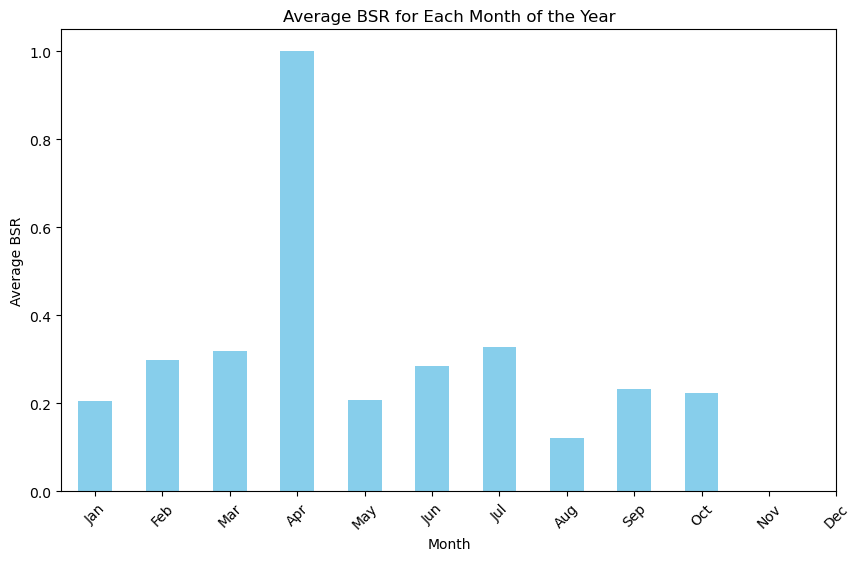

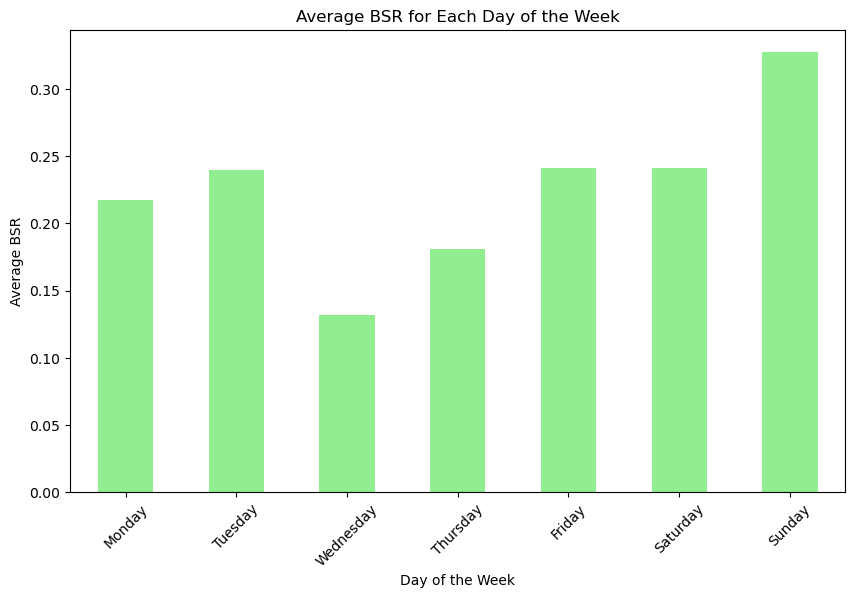

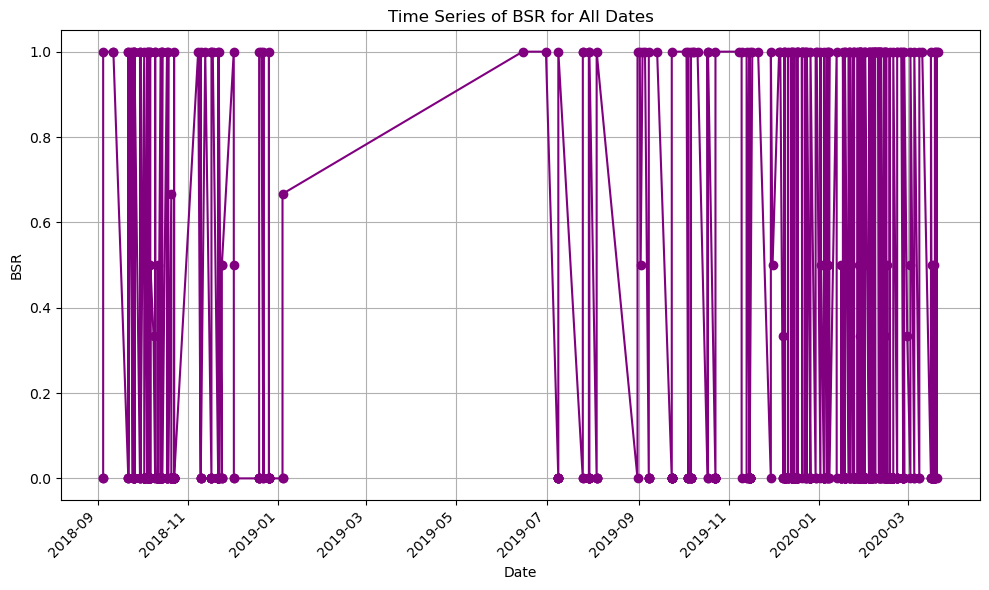

In [199]:
# Question number :10


sessions['search_time'] = pd.to_datetime(sessions['search_time'], utc=True,errors='coerce')
sessions['session_starting_time'] = pd.to_datetime(sessions['session_starting_time'], utc=True,errors='coerce')

# Merge the data on booking_id to associate session with bookings
merged_df = pd.merge(sessions, bookings, on='booking_id', how='left')

# Calculate the Booking to Search Ratio (BSR) for each session
merged_df['BSR'] = merged_df['booking_id'].notnull().astype(int)  # 1 if booking exists, 0 if not

# Step 1: Calculate the average BSR for each month of the year
merged_df['month'] = merged_df['search_time'].dt.month
monthly_bsr = merged_df.groupby('month')['BSR'].mean()

# Step 2: Calculate the average BSR for each day of the week
merged_df['day_of_week'] = merged_df['search_time'].dt.day_name()
day_of_week_bsr = merged_df.groupby('day_of_week')['BSR'].mean()

# Step 3: Calculate the time series of BSR for each date
daily_bsr = merged_df.groupby('search_time')['BSR'].mean()

# Plotting the results:

# 1. Plot Average BSR for each month
plt.figure(figsize=(10, 6))
monthly_bsr.plot(kind='bar', color='skyblue')
plt.title('Average BSR for Each Month of the Year')
plt.xlabel('Month')
plt.ylabel('Average BSR')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

# 2. Plot Average BSR for each day of the week
plt.figure(figsize=(10, 6))
# Order the days of the week correctly
day_of_week_bsr = day_of_week_bsr[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
day_of_week_bsr.plot(kind='bar', color='lightgreen')
plt.title('Average BSR for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average BSR')
plt.xticks(rotation=45)
plt.show()

# 3. Plot Time Series of BSR for all dates
plt.figure(figsize=(10, 6))
daily_bsr.plot(kind='line', marker='o', color='purple')
plt.title('Time Series of BSR for All Dates')
plt.xlabel('Date')
plt.ylabel('BSR')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()